In [1]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# EDA
import klib

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.base import ClassifierMixin
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean
from sklearn.feature_selection import RFE

import gc
import random
import re
from typing import List ,Dict, Tuple

from sklearn.metrics import *
from sklearn.model_selection import KFold, StratifiedKFold

# 한글 폰트 설정
from statsmodels import robust
from matplotlib import font_manager, rc
%matplotlib inline

import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [2]:
DATA_PATH = "data/"
SUBMIT_PATH = "submission/"
SEED = 42

In [3]:
train = pd.read_csv(f'{DATA_PATH}train.csv')
test = pd.read_csv(f'{DATA_PATH}test.csv')

d_code = pd.read_csv(f'{DATA_PATH}속성_D_코드.csv')
h_code = pd.read_csv(f'{DATA_PATH}속성_H_코드.csv')
l_code = pd.read_csv(f'{DATA_PATH}속성_L_코드.csv')

train.shape, test.shape

((501951, 35), (46404, 34))

## 데이터 살펴보기

In [4]:
train.iloc[:, :20].head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209


In [5]:
train.iloc[:, 20:].head()

,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


### D_code
- 코드 사이에 숫자가 밑의 코드로 갈린다
- 이걸 피처로 어떻게 나타낼 수 있을까

In [6]:
d_code.head()

,속성 D 코드,속성 D 세분류코드,속성 D 소분류코드,속성 D 중분류코드,속성 D 대분류코드
0,4,4,3,2,1
1,5,5,3,2,1
2,7,7,6,2,1
3,8,8,6,2,1
4,9,8,6,2,1


In [7]:
# 취향 희귀성? 대분류 ~ 세분류까지 nunique 값을 이용해서 무언가를 만들어본다면?

In [8]:
d_dae = pd.DataFrame(d_code.groupby('속성 D 대분류코드')['속성 D 중분류코드'].nunique().reset_index())
d_dae.columns = ['속성 D 대분류코드', 'D_dae_nunique']
d_dae.head()

,속성 D 대분류코드,D_dae_nunique
0,1,3
1,216,5
2,377,5
3,482,1
4,522,2


In [9]:
d_jung = pd.DataFrame(d_code.groupby('속성 D 중분류코드')['속성 D 소분류코드'].nunique().reset_index())
d_jung.columns = ['속성 D 중분류코드', 'D_jung_nunique']
d_jung.head()

,속성 D 중분류코드,D_jung_nunique
0,2,6
1,56,9
2,189,3
3,217,1
4,220,2


In [10]:
d_so = pd.DataFrame(d_code.groupby('속성 D 소분류코드')['속성 D 세분류코드'].nunique().reset_index())
d_so.columns = ['속성 D 소분류코드', 'D_so_nunique']
d_so.head()

,속성 D 소분류코드,D_so_nunique
0,3,2
1,6,4
2,16,8
3,29,3
4,37,3


In [11]:
d_se = pd.DataFrame(d_code.groupby('속성 D 세분류코드')['속성 D 코드'].nunique().reset_index())
d_se.columns = ['속성 D 세분류코드', 'D_se_nunique']
d_se.head()

,속성 D 세분류코드,D_se_nunique
0,4,1
1,5,1
2,7,1
3,8,6
4,14,1


In [12]:
d_code = d_code.merge(d_dae, on='속성 D 대분류코드', how='left')
d_code = d_code.merge(d_jung, on='속성 D 중분류코드', how='left')
d_code = d_code.merge(d_so, on='속성 D 소분류코드', how='left')
d_code = d_code.merge(d_se, on='속성 D 세분류코드', how='left')

In [13]:
d_code['D_코드다양성지수'] = d_code['D_dae_nunique'] * d_code['D_jung_nunique'] * d_code['D_so_nunique'] * d_code['D_se_nunique']

In [14]:
d_code['D_코드다양성지수'].nunique()

108

In [15]:
d_code.head()

,속성 D 코드,속성 D 세분류코드,속성 D 소분류코드,속성 D 중분류코드,속성 D 대분류코드,D_dae_nunique,D_jung_nunique,D_so_nunique,D_se_nunique,D_코드다양성지수
0,4,4,3,2,1,3,6,2,1,36
1,5,5,3,2,1,3,6,2,1,36
2,7,7,6,2,1,3,6,4,1,72
3,8,8,6,2,1,3,6,4,6,432
4,9,8,6,2,1,3,6,4,6,432


### H_code

In [16]:
h_code.head()

,속성 H 코드,속성 H 중분류코드,속성 H 대분류코드
0,2,315,1
1,4,316,3
2,5,317,3
3,6,318,3
4,7,319,3


In [17]:
h_dae = pd.DataFrame(h_code.groupby('속성 H 대분류코드')['속성 H 중분류코드'].nunique().reset_index())
h_dae.columns = ['속성 H 대분류코드', 'H_dae_nunique']
h_dae.head()

,속성 H 대분류코드,H_dae_nunique
0,1,1
1,3,26
2,30,17
3,48,9
4,58,11


In [18]:
h_jung = pd.DataFrame(h_code.groupby('속성 H 중분류코드')['속성 H 코드'].nunique().reset_index())
h_jung.columns = ['속성 H 중분류코드', 'H_jung_nunique']
h_jung.head()

,속성 H 중분류코드,H_jung_nunique
0,315,1
1,316,1
2,317,1
3,318,1
4,319,1


In [19]:
h_code = h_code.merge(h_dae, on='속성 H 대분류코드', how='left')
h_code = h_code.merge(h_jung, on='속성 H 중분류코드', how='left')

In [20]:
h_code['H_코드다양성지수'] = h_code['H_dae_nunique'] * h_code['H_jung_nunique']

In [21]:
h_code['H_코드다양성지수'].nunique()

22

In [22]:
h_code.head()

,속성 H 코드,속성 H 중분류코드,속성 H 대분류코드,H_dae_nunique,H_jung_nunique,H_코드다양성지수
0,2,315,1,1,1,1
1,4,316,3,26,1,26
2,5,317,3,26,1,26
3,6,318,3,26,1,26
4,7,319,3,26,1,26


## preprocessing & engineering

### 순서형 변수 처리
- 단순 category 형태가 아닌 ordinal 처리
- label encoding을 해볼까나

In [23]:
train['person_attribute_a_1'] = train['person_attribute_a_1'].astype(pd.CategoricalDtype(ordered=True))
train['person_attribute_b'] = train['person_attribute_b'].astype(pd.CategoricalDtype(ordered=True))
train['person_prefer_e'] = train['person_prefer_e'].astype(pd.CategoricalDtype(ordered=True))
train['contents_attribute_e'] = train['contents_attribute_e'].astype(pd.CategoricalDtype(ordered=True))

test['person_attribute_a_1'] = test['person_attribute_a_1'].astype(pd.CategoricalDtype(ordered=True))
test['person_attribute_b'] = test['person_attribute_b'].astype(pd.CategoricalDtype(ordered=True))
test['person_prefer_e'] = test['person_prefer_e'].astype(pd.CategoricalDtype(ordered=True))
test['contents_attribute_e'] = test['contents_attribute_e'].astype(pd.CategoricalDtype(ordered=True))

### 범주형 변수 인코딩
- 특성에 따라 다르게 인코딩

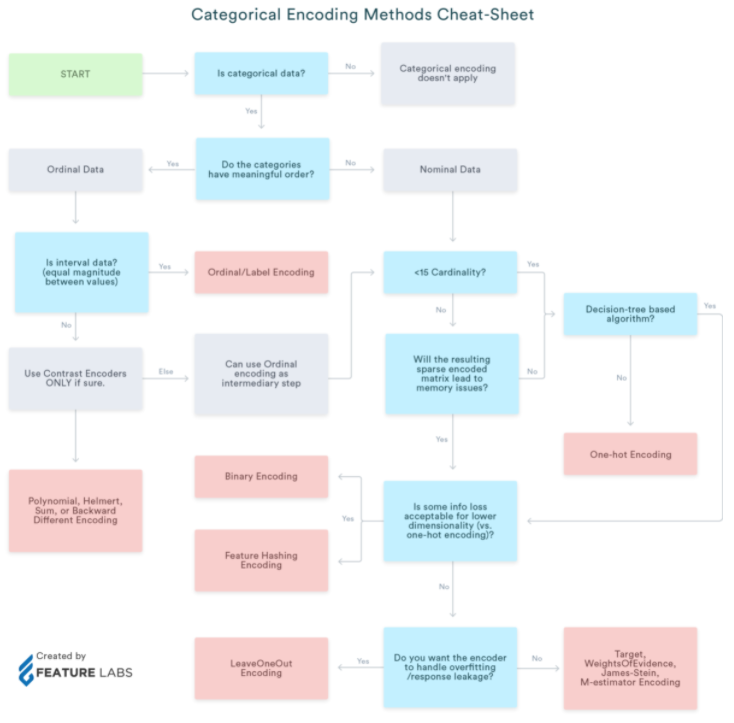

### 학습 파라미터

In [23]:
is_holdout = False
n_splits = 5
iterations = 10000
patience = 100

cv = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)

### 학습

In [24]:
scores = []
models = []


models = []
for tri, vai in cv.split(x_train):
    print("="*50)
    preds = []

    model = CatBoostClassifier(iterations=iterations, 
                               random_state=SEED,
                               #task_type="GPU",
                               eval_metric="F1",
                               cat_features=cat_features,
                               one_hot_max_size=4)
    
    model.fit(x_train.iloc[tri], y_train[tri],
              eval_set=[(x_train.iloc[vai], y_train[vai])],
              early_stopping_rounds=patience, verbose=100)
    
    models.append(model)
    scores.append(model.get_best_score()["validation"]["F1"])
    if is_holdout:
        break    

Learning rate set to 0.052683
0:	learn: 0.6230869	test: 0.6254085	best: 0.6254085 (0)	total: 2.62s	remaining: 7h 15m 58s
100:	learn: 0.6591116	test: 0.6867159	best: 0.6869707 (96)	total: 5m 5s	remaining: 8h 18m 45s
200:	learn: 0.6653748	test: 0.6908752	best: 0.6909253 (194)	total: 9m 45s	remaining: 7h 55m 33s
300:	learn: 0.6688739	test: 0.6929561	best: 0.6931330 (299)	total: 14m 39s	remaining: 7h 52m 30s
400:	learn: 0.6714251	test: 0.6938538	best: 0.6939539 (372)	total: 19m 54s	remaining: 7h 56m 23s
500:	learn: 0.6737887	test: 0.6951908	best: 0.6953474 (498)	total: 25m 16s	remaining: 7h 59m 8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.695347355
bestIteration = 498

Shrink model to first 499 iterations.
Learning rate set to 0.052683
0:	learn: 0.6012924	test: 0.6069882	best: 0.6069882 (0)	total: 2.53s	remaining: 7h 1m 58s
100:	learn: 0.6595166	test: 0.6902488	best: 0.6903276 (99)	total: 5m 18s	remaining: 8h 39m 54s
200:	learn: 0.6653870	test: 0.6972104	best: 0.

KeyboardInterrupt: 

### cv 결과 확인

In [25]:
print(scores)
print(np.mean(scores))

[0.6953473550031867, 0.7027558324987946, 0.6985513739545998, 0.6983449412117128, 0.6983091741908729]
0.6986617353718334


### threshold 정의

In [26]:
threshold = 0.4

### threshold값 변경에 따른 검증점수 확인 및 추론

In [27]:
pred_list = []
scores = []
for i,(tri, vai) in enumerate( cv.split(x_train) ):
    pred = models[i].predict_proba(x_train.iloc[vai])[:, 1]
    pred = np.where(pred >= threshold , 1, 0)
    score = f1_score(y_train[vai],pred)
    scores.append(score)
    pred = models[i].predict_proba(x_test)[:, 1]
    pred_list.append(pred)
print(scores)
print(np.mean(scores))

IndexError: list index out of range

### 산술평균 앙상블

In [40]:
pred = np.mean(pred_list, axis=0)
pred = np.where(pred >= threshold, 1, 0)

### submission

In [41]:
sample_submission = pd.read_csv(f'{DATA_PATH}sample_submission.csv')
sample_submission['target'] = pred
sample_submission

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
46399,46399,1
46400,46400,1
46401,46401,1
46402,46402,1


In [42]:
sample_submission['target'].value_counts()

1    29254
0    17150
Name: target, dtype: int64

In [43]:
sample_submission.to_csv(f"{SUBMIT_PATH}jp_1226_3.csv", index=False)

### feature importance
cb = CatBoostRegressor()
cb.get_feature_importance(type= "___")

 "type" possible values:
  - PredictionValuesChange
  - LossFunctionChange
  - FeatureImportance : 
      PredictionValuesChange for non-ranking metrics and LossFunctionChange for ranking metrics
  - ShapValues : 
      Calculate SHAP Values for every object
  - Interaction :
      Calculate pairwise score between every feature

In [ ]:
values = model.get_feature_importance(type='FeatureImportance')
fi = pd.DataFrame(x_train.columns)
fi['values'] = values
fi.columns = ['column', 'values']

In [ ]:
fi.sort_values(by='values', ascending=False).head(30)